In [64]:
import pandas as pd
# import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [7]:
# os.listdir()
# now_path = os.getcwd()
# now_path

In [183]:
sample_sub_df = pd.read_csv("../data/sample_submission.csv")
train_df = pd.read_csv("../data/train.csv", parse_dates=['release_date'])
test_df = pd.read_csv("../data/test.csv", parse_dates=['release_date'])

In [184]:
train_df.dtypes

id                                int64
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
Keywords                         object
cast                             object
crew                             object
revenue                           int64
dtype: object

In [98]:
# train_df['release_date'] = pd.to_datetime(train_df['release_date'], format="%m/%d/%y")

In [185]:
train_df['year'] = [train_df.iloc[i]['release_date'].year for i in range(len(train_df))]
train_df['month'] = [train_df.iloc[i]['release_date'].month for i in range(len(train_df))]
train_df['day'] = [train_df.iloc[i]['release_date'].day for i in range(len(train_df))]

In [191]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,year,month,day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5


In [192]:
test_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [193]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'year', 'month', 'day'],
      dtype='object')

In [194]:
test_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [195]:
train_df.shape, test_df.shape

((3000, 26), (4398, 22))

In [196]:
train_df.corr()

,id,budget,popularity,runtime,revenue,year,month,day
id,1.000000,0.019732,-0.007470,0.010750,0.000610,-0.011725,0.015039,0.033153
budget,0.019732,1.000000,0.342356,0.238373,0.752965,0.046047,0.031094,0.025745
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460,0.059965,-0.010692,0.039877
runtime,0.010750,0.238373,0.133690,1.000000,0.216380,0.097891,0.130236,0.044135
revenue,0.000610,0.752965,0.461460,0.216380,1.000000,0.020593,0.020164,0.045699
year,-0.011725,0.046047,0.059965,0.097891,0.020593,1.000000,-0.014098,-0.009714
month,0.015039,0.031094,-0.010692,0.130236,0.020164,-0.014098,1.000000,-0.006229
day,0.033153,0.025745,0.039877,0.044135,0.045699,-0.009714,-0.006229,1.000000


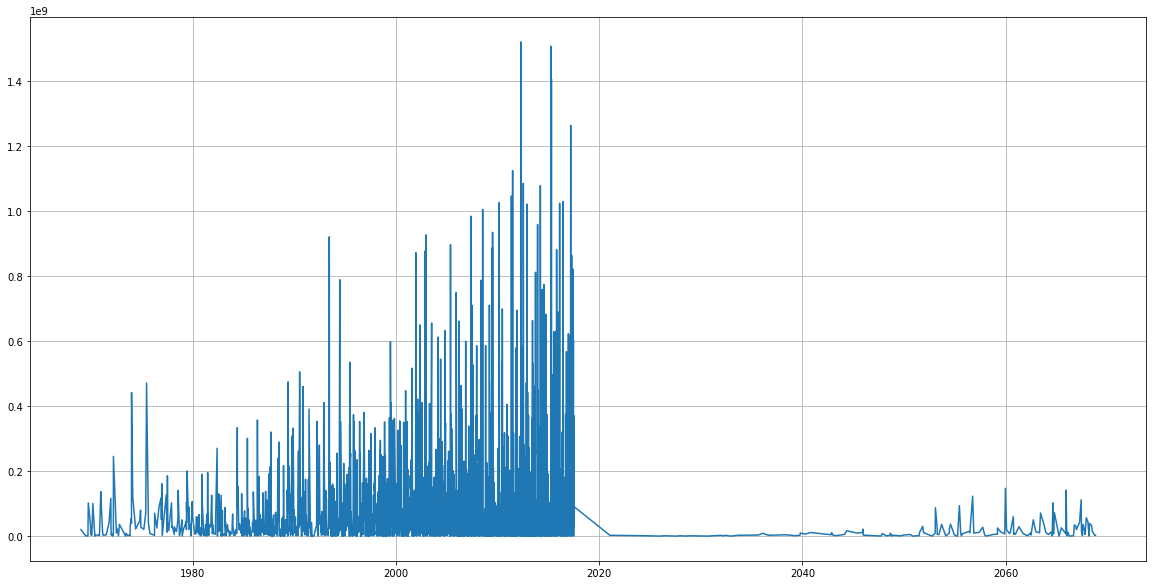

In [94]:
df = train_df.groupby(['release_date'])['revenue'].sum()
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(df)

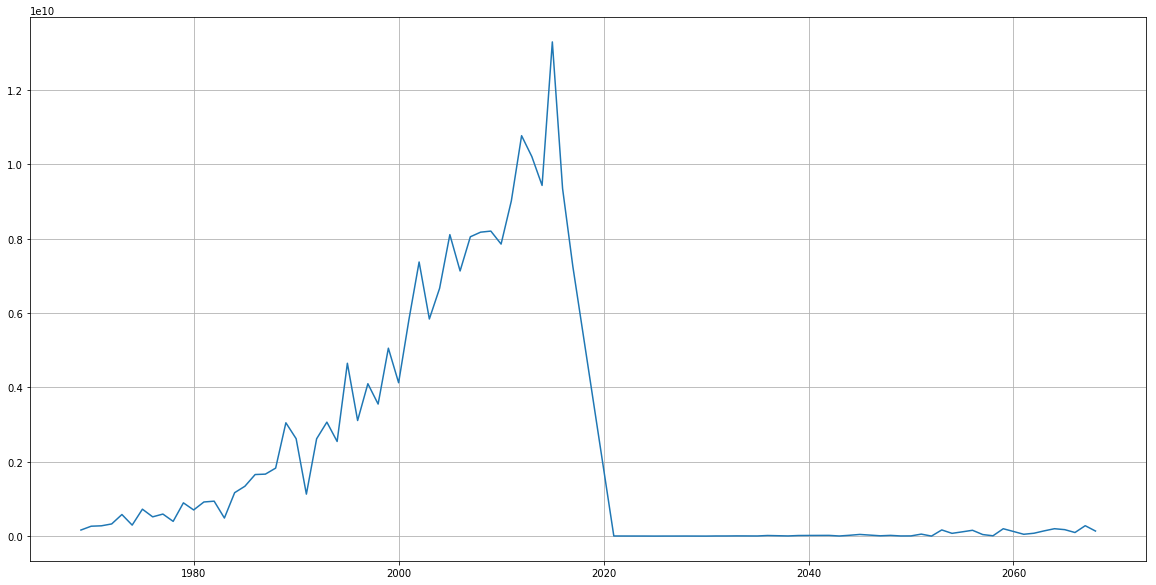

In [209]:
df = train_df.groupby(['year'])['revenue'].sum()
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(df)

In [216]:
pd.DataFrame(train_df.groupby(['year'])['revenue'].sum()).sort_values(by=['revenue'], ascending=False)[:5]

,revenue
year,
2015,13293335806
2012,10770751722
2013,10208471341
2014,9432880004
2016,9348124945


In [227]:
pd.DataFrame(train_df[train_df['year']>=2016].groupby(['year'])['revenue'].sum()).sort_values(by=['year'], ascending=True)[:5]

,revenue
year,
2016,9348124945
2017,7256157404
2021,2500000
2024,1213880
2025,45101


In [235]:
train_df.columns

NameError: name 'year' is not defined

In [92]:
train_df.sort_values(by=['release_date'], ascending=False)[:5]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2649,2650,NaN,1455000,"[{'id': 37, 'name': 'Western'}]",NaN,tt0063592,en,Shalako,"Sean Connery is Shalako, a guide in the old We...",6.229674,...,2068-11-06,113.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Sean Connery is Shalako! Shalako means action!...,Shalako,"[{'id': 10322, 'name': 'native american'}, {'i...","[{'cast_id': 3, 'character': ""Moses Zebulon 'S...","[{'credit_id': '52fe47029251416c9106740b', 'de...",2620000
647,648,NaN,9000000,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,tt0062711,en,Barbarella,"In the far future, a highly sexual woman is ta...",14.304205,...,2068-10-10,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,See Barbarella do her thing!,Barbarella,"[{'id': 9835, 'name': 'sexual fantasy'}, {'id'...","[{'cast_id': 2, 'character': 'Barbarella', 'cr...","[{'credit_id': '52fe4491c3a36847f809d5ab', 'de...",2500000
140,141,NaN,14320000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt0063642,en,Star!,Gertrude Lawrence rises to stage stardom at th...,0.585397,...,2068-07-18,176.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Happiness is a girl called Julie!,Star!,"[{'id': 4344, 'name': 'musical'}, {'id': 12990...","[{'cast_id': 3, 'character': 'Gertrude Lawrenc...","[{'credit_id': '52fe484bc3a36847f81602c9', 'de...",14000000
2147,2148,"[{'id': 264338, 'name': ""Rosemary's Baby Colle...",3200000,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,tt0063522,en,Rosemary's Baby,A young couple moves into an infamous New York...,11.504558,...,2068-06-12,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pray for Rosemary's Baby,Rosemary's Baby,"[{'id': 8685, 'name': 'anti-christ'}, {'id': 1...","[{'cast_id': 15, 'character': 'Rosemary Woodho...","[{'credit_id': '52fe4279c3a36847f8021573', 'de...",33395426
1034,1035,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0063518,en,Romeo and Juliet,Director Franco Zeffirelli's beloved version o...,6.990990,...,2068-04-02,138.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No ordinary love story...,Romeo and Juliet,"[{'id': 255, 'name': 'male nudity'}, {'id': 16...","[{'cast_id': 6, 'character': 'Romeo', 'credit_...","[{'credit_id': '52fe4435c3a36847f80889c3', 'de...",38901218


In [93]:
train_df.sort_values(by=['release_date'], ascending=True)[:5]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
544,545,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0065054,en,Sweet Charity,Taxi dancer Charity continues to have Faith in...,0.537378,...,1969-01-01,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is what it's all about!,Sweet Charity,"[{'id': 978, 'name': 'broken engagement'}, {'i...","[{'cast_id': 2, 'character': 'Charity', 'credi...","[{'credit_id': '52fe460dc3a36847f80e9a35', 'de...",20000000
228,229,NaN,6244087,"[{'id': 12, 'name': 'Adventure'}, {'id': 37, '...",NaN,tt0065214,en,The Wild Bunch,Aging outlaw Pike Bishop (William Holden) prep...,11.722424,...,1969-06-17,145.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,If you only want to spend two hours in a movie...,The Wild Bunch,"[{'id': 240, 'name': 'underdog'}, {'id': 642, ...","[{'cast_id': 16, 'character': 'Pike Bishop', '...","[{'credit_id': '52fe4254c3a36847f8015e73', 'de...",638641
500,501,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",NaN,tt0064040,fr,L'Armée des ombres,"Betrayed by an informant, Philippe Gerbier (Li...",7.872569,...,1969-09-10,145.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Betrayal. Loyalty. Collaboration. Resistance.,Army of Shadows,"[{'id': 90, 'name': 'paris'}, {'id': 1631, 'na...","[{'cast_id': 2, 'character': 'Philippe Gerbier...","[{'credit_id': '52fe46549251416c75074e6f', 'de...",741766
1471,1472,NaN,6000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,tt0064115,en,Butch Cassidy and the Sundance Kid,"In late 1890s Wyoming, Butch Cassidy is the af...",6.714577,...,1969-09-23,110.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Not that it matters, but most of it is true.",Butch Cassidy and the Sundance Kid,"[{'id': 1016, 'name': 'wyoming'}, {'id': 6165,...","[{'cast_id': 17, 'character': 'Butch Cassidy',...","[{'credit_id': '52fe4263c3a36847f801a7f5', 'de...",102308889
2318,2319,NaN,24000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,tt0064418,en,"Hello, Dolly!","Matchmaker, Dolly Levi takes a trip to Yonkers...",8.407519,...,1969-12-12,146.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"Hello, Dolly!","[{'id': 10181, 'name': 'based on play or music...","[{'cast_id': 1, 'character': 'Dolly Levi', 'cr...","[{'credit_id': '52fe45c59251416c75061e71', 'de...",33208099


In [90]:
train_df[train_df['release_date']>'2019-01-01']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2649,2650,NaN,1455000,"[{'id': 37, 'name': 'Western'}]",NaN,tt0063592,en,Shalako,"Sean Connery is Shalako, a guide in the old We...",6.229674,...,2068-11-06,113.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Sean Connery is Shalako! Shalako means action!...,Shalako,"[{'id': 10322, 'name': 'native american'}, {'i...","[{'cast_id': 3, 'character': ""Moses Zebulon 'S...","[{'credit_id': '52fe47029251416c9106740b', 'de...",2620000
647,648,NaN,9000000,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,tt0062711,en,Barbarella,"In the far future, a highly sexual woman is ta...",14.304205,...,2068-10-10,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,See Barbarella do her thing!,Barbarella,"[{'id': 9835, 'name': 'sexual fantasy'}, {'id'...","[{'cast_id': 2, 'character': 'Barbarella', 'cr...","[{'credit_id': '52fe4491c3a36847f809d5ab', 'de...",2500000
140,141,NaN,14320000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt0063642,en,Star!,Gertrude Lawrence rises to stage stardom at th...,0.585397,...,2068-07-18,176.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Happiness is a girl called Julie!,Star!,"[{'id': 4344, 'name': 'musical'}, {'id': 12990...","[{'cast_id': 3, 'character': 'Gertrude Lawrenc...","[{'credit_id': '52fe484bc3a36847f81602c9', 'de...",14000000
2147,2148,"[{'id': 264338, 'name': ""Rosemary's Baby Colle...",3200000,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,tt0063522,en,Rosemary's Baby,A young couple moves into an infamous New York...,11.504558,...,2068-06-12,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pray for Rosemary's Baby,Rosemary's Baby,"[{'id': 8685, 'name': 'anti-christ'}, {'id': 1...","[{'cast_id': 15, 'character': 'Rosemary Woodho...","[{'credit_id': '52fe4279c3a36847f8021573', 'de...",33395426
1034,1035,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0063518,en,Romeo and Juliet,Director Franco Zeffirelli's beloved version o...,6.990990,...,2068-04-02,138.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No ordinary love story...,Romeo and Juliet,"[{'id': 255, 'name': 'male nudity'}, {'id': 16...","[{'cast_id': 6, 'character': 'Romeo', 'credit_...","[{'credit_id': '52fe4435c3a36847f80889c3', 'de...",38901218
1187,1188,NaN,747000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",NaN,tt0061955,fr,La mariée était en noir,Julie Kohler is prevented from suicide by her ...,2.775402,...,2068-03-22,107.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,She was a bride when the violence happened... ...,The Bride Wore Black,"[{'id': 1522, 'name': 'repayment'}, {'id': 901...","[{'cast_id': 8, 'character': 'Julie Kohler', '...","[{'credit_id': '52fe43b1c3a36847f80681ff', 'de...",44566
634,635,"[{'id': 221966, 'name': 'The Odd Couple Collec...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0063374,en,The Odd Couple,Felix Ungar has just broken up with his wife. ...,8.353900,...,2068-02-07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Even More Funny On The Screen... Than It Was A...,The Odd Couple,"[{'id': 383, 'name': 'poker'}, {'id': 1253, 'n...","[{'cast_id': 1, 'character': 'Felix Ungar', 'c...","[{'credit_id': '52fe442f9251416c7502bc2d', 'de...",44527234
731,732,NaN,4000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0061735,en,Guess Who's Coming to Dinner,Matt and Christina Drayton are a couple whose ...,5.032469,...,2067-12-11,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A love story of today,Guess Who's Coming to Dinner,"[{'id': 582, 'name': 'san francisco'}, {'id': ...","[{'cast_id': 1, 'character': 'Matt Drayton', '...","[{'credit_id': '52fe431dc3a36847f803b563', 'de...",56666667
1350,1351,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0061502,en,The Comedians,"Set in the Haiti of ""Papa Doc

In [89]:
test_df[test_df['release_date']>'2019-01-01']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
46,3047,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",NaN,tt0037382,en,To Have and Have Not,A Martinique charter boat skipper gets mixed u...,10.003167,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2044-10-11,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,TALK ABOUT T.N.T.! THIS is IT!,To Have and Have Not,"[{'id': 1495, 'name': 'fishing'}, {'id': 2041,...","[{'cast_id': 1, 'character': 'Steve Morgan', '...","[{'credit_id': '52fe4446c3a368484e019ebd', 'de..."
83,3084,NaN,337,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,tt0019195,en,The Mysterious Lady,A beautiful Russian spy seduces an Austrian mi...,0.765930,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2028-08-04,89.0,NaN,Released,GRETA GARBO AND CONRAD NAGEL The Screen's Newe...,The Mysterious Lady,"[{'id': 154802, 'name': 'silent film'}, {'id':...","[{'cast_id': 1, 'character': 'Tania Fedorova',...","[{'credit_id': '5555cd0dc3a3687772002448', 'de..."
95,3096,NaN,2361000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0036628,en,Bathing Beauty,A big splash in her first starring role: Esthe...,0.789574,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2044-07-01,101.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,M.G.M's Mammoth Technicolor Musical Spectacle!,Bathing Beauty,"[{'id': 4344, 'name': 'musical'}, {'id': 7665,...","[{'cast_id': 2, 'character': 'Steve Elliott', ...","[{'credit_id': '553d4d9192514135c8004825', 'de..."
103,3104,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0061595,en,Double Trouble,When singer Gut Lambert goes on tour in Europe...,0.535616,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2067-04-05,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,ELVIS with songs and adventures in mad mod Eur...,Double Trouble,"[{'id': 4048, 'name': 'musician'}, {'id': 5694...","[{'cast_id': 1, 'character': 'Guy Lambert', 'c...","[{'credit_id': '598cc8189251414c03000310', 'de..."
114,3115,NaN,5115000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",NaN,tt0060397,en,Fantastic Voyage,The science of miniaturization has been unlock...,12.538410,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2066-08-24,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Fantastic and Spectacular Voyage... Through ...,Fantastic Voyage,"[{'id': 339, 'name': 'submarine'}, {'id': 732,...","[{'cast_id': 11, 'character': 'Grant', 'credit...","[{'credit_id': '52fe433cc3a36847f8044a6f', 'de..."
119,3120,NaN,92620000,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,tt0017136,de,Metropolis,In a futuristic city sharply divided between t...,14.487867,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2027-01-10,153.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,There can be no understanding between the hand...,Metropolis,"[{'id': 312, 'name': 'man vs machine'}, {'id':...","[{'cast_id': 10, 'character': 'Maria', 'credit...","[{'credit_id': '52fe420fc3a36847f8000c55', 'de..."
120,3121,"[{'id': 158391, 'name': 'The Apu Collection', ...",0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0052572,bn,অপুর সংসার,Apu is a jobless ex-student dreaming vaguely o...,2.381806,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2059-05-01,117

# Build model

In [78]:
from sklearn import linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

In [ ]:
# Make predictions using the testing set
submit = pd.DataFrame({'ID': test_id_idx, 'item_cnt_month': regr.predict(x_test)})
submit.head()

In [ ]:
submit.to_csv('../result/submission_linear_regression.csv', index=False)